# Heart Failure Prediction and Time to Death Estimation

In this notebook we aim to predict whether a patient will survive or die based on clinical features and health metrics.


### 1.Data Loading and Exploration

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('../../data/007/heart_failure_clinical_records_dataset.csv')
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
X = data.drop(columns=['DEATH_EVENT', 'time'])
y = data['DEATH_EVENT']

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X=pd.DataFrame(data=scaler.fit_transform(X),columns=X.columns)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
from pycaret.classification import *
s0=setup(data=pd.concat([X_train,y_train],axis=1),target='DEATH_EVENT',preprocess=False)

,Description,Value
0,Session id,3019
1,Target,DEATH_EVENT
2,Target type,Binary
3,Original data shape,"(239, 12)"
4,Transformed data shape,"(239, 12)"
5,Transformed train set shape,"(167, 12)"
6,Transformed test set shape,"(72, 12)"
7,Numeric features,11


In [8]:
best_classifier_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7783,0.7367,0.5200,0.7095,0.5762,0.4352,0.4580,3.3820
lda,Linear Discriminant Analysis,0.7724,0.7314,0.5000,0.6850,0.5671,0.4186,0.4347,0.0160
ridge,Ridge Classifier,0.7603,0.7330,0.4600,0.6583,0.5321,0.3789,0.3952,0.0190
gbc,Gradient Boosting Classifier,0.7371,0.7168,0.4800,0.5500,0.4897,0.3321,0.3474,0.0960
et,Extra Trees Classifier,0.7364,0.7378,0.3400,0.5917,0.4167,0.2731,0.2939,0.1300
rf,Random Forest Classifier,0.7250,0.7777,0.3600,0.5500,0.4274,0.2644,0.2751,0.1530
xgboost,Extreme Gradient Boosting,0.7191,0.7368,0.4400,0.4938,0.4531,0.2824,0.2900,0.0820
lightgbm,Light Gradient Boosting Machine,0.7132,0.7161,0.4600,0.5388,0.4817,0.2896,0.2993,0.0840
nb,Naive Bayes,0.7070,0.7064,0.2600,0.5767,0.3354,0.1809,0.2164,0.0190
qda,Quadratic Discriminant Analysis,0.7007,0.6459,0.2600,0.6250,0.3375,0.1764,0.2259,0.0210


In [9]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report,f1_score,recall_score
y_pred =best_classifier_model.predict(X_test)
print(f"score :{best_classifier_model.score(X_test,y_test):.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1score=f1_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1score:.2f}")
print(f"Recall: {recall:.2f}")

score :0.68
Confusion Matrix:
[[32  3]
 [16  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        35
           1       0.75      0.36      0.49        25

    accuracy                           0.68        60
   macro avg       0.71      0.64      0.63        60
weighted avg       0.70      0.68      0.65        60

Accuracy: 0.68
F1 Score: 0.49
Recall: 0.36


The Models did very poorly specially in term of F1-score and Recall which means that the dataset might be unbalanced

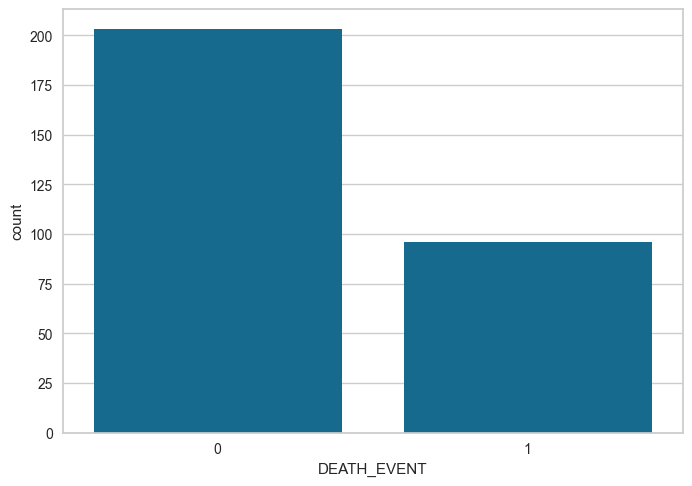

In [10]:
sns.countplot(x='DEATH_EVENT', data=data)
plt.show()

the dataset is slightly imbalanced 

we will use both oversampling and undersampling to balance the dataset and train models on both to see which one is the better method in this case

### Over Sampling

In [11]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = data.drop(columns=['DEATH_EVENT', 'time'])
y = data['DEATH_EVENT']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X, y)

# Check the new class distribution
print("Resampled class distribution:", y_over.value_counts())

Resampled class distribution: DEATH_EVENT
1    203
0    203
Name: count, dtype: int64


In [12]:
from imblearn.under_sampling import RandomUnderSampler

# Apply RandomUnderSampler to undersample the majority class
undersample = RandomUnderSampler(random_state=42)
X_under , y_under = undersample.fit_resample(X, y)

# Check the new class distribution
print("Resampled class distribution:", y_under.value_counts())

Resampled class distribution: DEATH_EVENT
0    96
1    96
Name: count, dtype: int64


In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y_under=y_under.reset_index(drop=True)
X_under=X_under.reset_index(drop=True)
X_over=pd.DataFrame(data=scaler.fit_transform(X_over),columns=X_over.columns)
X_under=pd.DataFrame(data=scaler.fit_transform(X_under),columns=X_under.columns)

In [14]:
# y_under=y_under.reset_index(drop=True)
X_over


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,1.066564,-0.769517,-0.014386,-0.749359,-1.425690,1.562267,0.014313,0.368936,-1.457235,0.814822,-0.575454
1,-0.628455,-0.769517,7.714390,-0.749359,0.119689,-0.640095,-0.003101,-0.388056,-0.061315,0.814822,-0.575454
2,0.219055,-0.769517,-0.477327,-0.749359,-1.425690,-0.640095,-1.078087,-0.198808,-1.689888,0.814822,1.737758
3,-1.052210,1.299516,-0.514490,-0.749359,-1.425690,-0.640095,-0.569007,0.368936,0.171338,0.814822,-0.575454
4,0.219055,1.299516,-0.462462,1.334474,-1.425690,-0.640095,0.671874,1.125927,-4.714381,-1.227262,-0.575454
...,...,...,...,...,...,...,...,...,...,...,...
401,-0.385015,-0.769517,-0.193829,-0.749359,-0.137874,-0.640095,1.298714,2.440611,0.869298,0.814822,-0.575454
402,0.736297,-0.769517,-0.014386,-0.749359,-1.425690,-0.640095,-0.003101,0.302699,-0.526622,0.814822,-0.575454
403,-0.741623,-0.769517,1.001748,-0.749359,-0.309583,-0.640095,-2.051321,-0.299889,-0.061315,-1.227262,-0.575454
404,1.263282,1.299516,-0.220374,-0.749359,-1.683253,-0.640095,-1.385285,1.112226,-0.293968,0.814822,-0.575454


In [15]:
X_under

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,1.028603,1.087115,-0.382153,1.195985,0.054728,1.262773,0.238211,-0.752922,-1.180973,0.740532,1.578261
1,-1.411911,-0.919866,-0.005599,-0.836131,3.423633,-0.791908,0.042685,-0.253367,0.152832,-1.350381,-0.633609
2,1.272654,1.087115,-0.520256,-0.836131,0.215152,-0.791908,0.178484,-0.666792,0.152832,0.740532,1.578261
3,0.215098,1.087115,-0.251005,-0.836131,-0.185908,1.262773,-0.239605,-0.580662,-0.069469,-1.350381,-0.633609
4,-0.028953,-0.919866,-0.304656,1.195985,-0.185908,-0.791908,-0.378968,-0.408401,-0.069469,-1.350381,-0.633609
...,...,...,...,...,...,...,...,...,...,...,...
187,0.865902,-0.919866,-0.005599,-0.836131,-1.389088,-0.791908,0.042685,0.306480,-0.514071,0.740532,-0.633609
188,-0.191654,-0.919866,-0.418914,-0.836131,-0.586968,-0.791908,-1.961732,0.194511,-2.070177,-1.350381,-0.633609
189,-0.598406,-0.919866,1.420140,-0.836131,-0.988028,-0.791908,0.546800,-0.322271,0.375133,0.740532,-0.633609
190,0.215098,1.087115,-0.327508,1.195985,-0.988028,-0.791908,-0.607921,-0.063880,-1.625575,0.740532,-0.633609


Splitting the data into Train and Test sets

In [16]:
from sklearn.model_selection import train_test_split
X_under_train,X_under_test,y_under_train,y_under_test=train_test_split(X_under,y_under,test_size=0.2,random_state=42)
X_over_train,X_over_test,y_over_train,y_over_test=train_test_split(X_over,y_over,test_size=0.2,random_state=42)

In [17]:
X_under_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
82,-1.005159,-0.919866,1.250243,1.195985,-0.185908,-0.791908,0.042685,-0.253367,0.152832,0.740532,1.578261
109,-1.005159,1.087115,-0.416927,-0.836131,0.054728,1.262773,0.168529,-0.322271,0.152832,0.740532,-0.633609
162,0.784552,1.087115,-0.257960,-0.836131,-0.586968,1.262773,3.602828,0.194511,0.375133,-1.350381,1.578261
35,-1.818663,-0.919866,-0.108928,1.195985,-0.586968,-0.791908,0.437301,-0.494531,-0.069469,0.740532,-0.633609
135,-1.005159,-0.919866,-0.005599,1.195985,0.054728,-0.791908,0.506982,0.366771,-0.291770,0.740532,1.578261
...,...,...,...,...,...,...,...,...,...,...,...
106,1.028603,1.087115,-0.503366,-0.836131,0.054728,1.262773,1.084342,2.175507,-1.180973,0.740532,1.578261
14,-0.110304,-0.919866,-0.337443,-0.836131,-0.586968,1.262773,0.078939,-0.666792,-0.069469,0.740532,1.578261
92,-0.761107,1.087115,-0.005599,-0.836131,0.616212,-0.791908,0.457209,-0.322271,0.152832,0.740532,1.578261
179,-0.354355,1.087115,-0.439779,-0.836131,-0.988028,-0.791908,-0.398877,-0.236141,0.152832,0.740532,1.578261


In [18]:
X_over_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
395,1.084806,-0.769517,-0.528293,-0.749359,0.119689,-0.640095,-0.420221,0.916312,-0.526622,0.814822,-0.575454
3,-1.052210,1.299516,-0.514490,-0.749359,-1.425690,-0.640095,-0.569007,0.368936,0.171338,0.814822,-0.575454
18,0.642809,1.299516,-0.499625,-0.749359,-0.996418,1.562267,-0.282650,-0.482680,0.869298,-1.227262,-0.575454
131,-0.204700,1.299516,0.516509,1.334474,0.720669,-0.640095,-0.144774,4.343139,-1.224582,0.814822,-0.575454
118,0.219055,1.299516,-0.512366,1.334474,2.008484,1.562267,-0.643248,-0.577303,0.869298,-1.227262,-0.575454
...,...,...,...,...,...,...,...,...,...,...,...
71,-0.374202,-0.769517,-0.014386,1.334474,-0.137874,-0.640095,-1.502320,-0.577303,0.636645,0.814822,1.737758
106,-0.628455,-0.769517,0.161871,-0.749359,0.720669,-0.640095,-0.006898,-0.198808,0.171338,0.814822,-0.575454
270,-1.560715,-0.769517,-0.014386,1.334474,-0.567146,1.562267,-0.003101,0.085064,-1.457235,0.814822,1.737758
348,0.106059,-0.769517,0.909372,-0.749359,-0.738855,-0.640095,1.082673,0.997667,0.869298,-1.227262,-0.575454


Finding best model for death prediction

In [19]:
from pycaret.classification import *

s=setup(data=pd.concat([X_over_train,y_over_train],axis=1),target='DEATH_EVENT',preprocess=False)

,Description,Value
0,Session id,4403
1,Target,DEATH_EVENT
2,Target type,Binary
3,Original data shape,"(324, 12)"
4,Transformed data shape,"(324, 12)"
5,Transformed train set shape,"(226, 12)"
6,Transformed test set shape,"(98, 12)"
7,Numeric features,11


In [20]:
best_classifier_over_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7789,0.8538,0.8053,0.7758,0.7844,0.5581,0.5674,0.1750
rf,Random Forest Classifier,0.7613,0.8625,0.7811,0.7591,0.7629,0.5240,0.5342,0.2100
lightgbm,Light Gradient Boosting Machine,0.7571,0.8238,0.7902,0.7484,0.7625,0.5145,0.5248,0.1000
ada,Ada Boost Classifier,0.7437,0.7582,0.7182,0.7563,0.7245,0.4882,0.4999,0.0880
ridge,Ridge Classifier,0.7433,0.8355,0.7795,0.7376,0.7520,0.4857,0.4974,0.0170
lda,Linear Discriminant Analysis,0.7433,0.8355,0.7795,0.7376,0.7520,0.4857,0.4974,0.0280
xgboost,Extreme Gradient Boosting,0.7433,0.8216,0.7364,0.7465,0.7375,0.4873,0.4926,0.0510
gbc,Gradient Boosting Classifier,0.7397,0.8320,0.7629,0.7286,0.7415,0.4805,0.4863,0.1260
lr,Logistic Regression,0.7387,0.8379,0.7614,0.7344,0.7438,0.4763,0.4823,0.0330
nb,Naive Bayes,0.7304,0.7955,0.6553,0.7675,0.6975,0.4595,0.4716,0.0190


In [21]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report,f1_score,recall_score
y_pred =best_classifier_over_model.predict(X_over_test)
print(f"score :{best_classifier_over_model.score(X_over_test,y_over_test):.2f}")
conf_matrix = confusion_matrix(y_over_test, y_pred)
class_report = classification_report(y_over_test, y_pred)
accuracy = accuracy_score(y_over_test, y_pred)
f1score=f1_score(y_over_test, y_pred)
recall=recall_score(y_over_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1score:.2f}")
print(f"Recall: {recall:.2f}")


score :0.79
Confusion Matrix:
[[35  6]
 [11 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.83      0.73      0.78        41

    accuracy                           0.79        82
   macro avg       0.80      0.79      0.79        82
weighted avg       0.80      0.79      0.79        82

Accuracy: 0.79
F1 Score: 0.78
Recall: 0.73


The `over sampling` method did well with an accuracy f1 score and recall all above 78%

Next we try the under sampling

In [22]:
# y_under_train = y_under_train.rename('DEATH_EVENT')

# Concatenate features and target
data_under_train = pd.concat([X_under_train, y_under_train], axis=1)

In [23]:
print(X_under_train.shape)
print(y_under_train.shape)

(153, 11)
(153,)


In [24]:
print(data_under_train.isnull().sum())  

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64


In [25]:


# Now, pass this to PyCaret
s2 = setup(data=data_under_train, target='DEATH_EVENT', preprocess=False)


,Description,Value
0,Session id,4911
1,Target,DEATH_EVENT
2,Target type,Binary
3,Original data shape,"(153, 12)"
4,Transformed data shape,"(153, 12)"
5,Transformed train set shape,"(107, 12)"
6,Transformed test set shape,"(46, 12)"
7,Numeric features,11


In [26]:
best_classifier_under_model=compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:03:28
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7364,0.7340,0.6567,0.8000,0.7094,0.4723,0.4918,0.0250
nb,Naive Bayes,0.7191,0.7840,0.5300,0.8417,0.6266,0.4411,0.4744,0.0180
rf,Random Forest Classifier,0.7091,0.7523,0.6067,0.7600,0.6617,0.4208,0.4324,0.1610
qda,Quadratic Discriminant Analysis,0.7000,0.6987,0.5667,0.8117,0.6381,0.4038,0.4363,0.0160
gbc,Gradient Boosting Classifier,0.6900,0.6980,0.6400,0.7500,0.6773,0.3854,0.4006,0.0940
dt,Decision Tree Classifier,0.6891,0.6917,0.6600,0.7404,0.6668,0.3802,0.4086,0.0170
lightgbm,Light Gradient Boosting Machine,0.6818,0.7000,0.7000,0.6848,0.6687,0.3687,0.4011,0.0630
svm,SVM - Linear Kernel,0.6709,0.6920,0.6600,0.6721,0.6606,0.3451,0.3483,0.0170
xgboost,Extreme Gradient Boosting,0.6700,0.6907,0.6367,0.6917,0.6550,0.3396,0.3481,0.0540
et,Extra Trees Classifier,0.6527,0.7073,0.5467,0.7200,0.5965,0.3074,0.3268,0.1210


In [27]:
y_pred =best_classifier_under_model.predict(X_under_test)
print(f"score :{best_classifier_under_model.score(X_under_test,y_under_test):.2f}")
conf_matrix = confusion_matrix(y_under_test, y_pred)
class_report = classification_report(y_under_test, y_pred)
accuracy = accuracy_score(y_under_test, y_pred)
f1score=f1_score(y_under_test, y_pred)
recall=recall_score(y_under_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1score:.2f}")
print(f"Recall: {recall:.2f}")

score :0.67
Confusion Matrix:
[[13  5]
 [ 8 13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.72      0.67        18
           1       0.72      0.62      0.67        21

    accuracy                           0.67        39
   macro avg       0.67      0.67      0.67        39
weighted avg       0.67      0.67      0.67        39

Accuracy: 0.67
F1 Score: 0.67
Recall: 0.62


The over sampling method is better than undersampling in this case

In [28]:
print(f"score :{best_classifier_over_model.score(X_test,y_test):.2f}")

score :0.80


In [118]:
y_pred =best_classifier_over_model.predict(X_test)
print(f"score :{best_classifier_over_model.score(X_test,y_test):.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1score=f1_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1score:.2f}")
print(f"Recall: {recall:.2f}")

score :0.80
Confusion Matrix:
[[30  5]
 [ 7 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       0.78      0.72      0.75        25

    accuracy                           0.80        60
   macro avg       0.80      0.79      0.79        60
weighted avg       0.80      0.80      0.80        60

Accuracy: 0.80
F1 Score: 0.75
Recall: 0.72


### Conclusion 

After balancing the data using over sampling method we were able to train a model and get good accuracy f1score and recall 